# TFM Máster Data Science UAH 2020-2021

### MIGUEL PÉREZ CARO

Este notebook tiene como objetivo el análisis del dataset obtenido a través de Twitter para conoce que tipo de dato tenemos, coomoo está distribuido o la calidad del mismo.

En primer lugar se importan las librerías.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

Se establece el directorio de trabajo y se cargan los datos.

In [3]:
directorio = os.path.dirname(os.getcwd())
mydir = os.path.join(directorio, 'data')
os.chdir(mydir)

In [4]:
df = pd.read_csv('df_raw.csv')

Se obtiene información básica del conjunto de datos.

In [5]:
df.head()

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta
0,1419550074791763968,2021-07-26 06:48:06,"RT @JohnRLottJr: ""A United Airlines flight was...",4.0,0.0,0.0,0.0,1.0,0.0
1,1419551078027202560,2021-07-26 06:52:05,@airvistara I have a booking from HYD to LAX w...,0.0,0.0,0.0,0.0,1.0,0.0
2,1419552199525425156,2021-07-26 06:56:33,US$263 - Cheap flights to West Palm Beach from...,0.0,0.0,0.0,0.0,1.0,0.0
3,1419553072699920385,2021-07-26 07:00:01,🔁 #ICYMI | The Bureau d’Enquêtes et Analyses (...,0.0,1.0,0.0,0.0,1.0,0.0
4,1419555506251837440,2021-07-26 07:09:41,United Airlines evacuates plane ready for take...,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.shape

(566651, 9)

### Tipo de los datos

En primer lugar se quire coomprobar que el tipo de los datos sea el correcto y no haya ningún problema

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566651 entries, 0 to 566650
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              566651 non-null  object 
 1   created_at      566651 non-null  object 
 2   text            566651 non-null  object 
 3   retweet_count   566647 non-null  float64
 4   favorite_count  566647 non-null  float64
 5   southwest       566647 non-null  float64
 6   american        566647 non-null  float64
 7   united          566643 non-null  float64
 8   delta           566643 non-null  float64
dtypes: float64(6), object(3)
memory usage: 38.9+ MB


Es importante fijarse en el tipo de dato de cada columna:

- id: lo recoge como un texto cuando podría se un número. En principio no debería causar ningún problema aunque es conveniente comprobar que todo sean números y que no hay ningún id que causee problemas.
- created_at: mismo caso que el anterior pero con fechas.
- text: está como un objeto, por lo que parece correcto.
- retweet_count: aparece como un objeto, pero debería ser de tipo numérico por lo que algo debe haber fallado.
- favorite_count: es de tipo float, por lo que parece correcto.
- southwest: es de tipo float, por lo que parece correcto.
- american: es de tipo float, por lo que parece correcto.
- united: es de tipo float, por lo que parece correcto.
- delta: es de tipo float, por lo que parece correcto.

Visto lo anterior, se puede proceder a comprobar que todos se pueden pasar al tipo correcto.


In [8]:
# Comprobar id
identificador = df['id'].astype('float64')

ValueError: could not convert string to float: '😊❤'

Se observa un fallo en un identificador, por lo que se procede a modificar todos los valores a float y sustituir por valores nulos aquellos que no puedan ser modificados.

In [9]:
df['id'] = pd.to_numeric(df['id'], errors = 'coerce')

In [10]:
df['id'].isnull().sum()

4

In [11]:
df.dropna(inplace=True)

A continuación se hace lo mismo con el resto de campos:

In [12]:
df['created_at'] = df['created_at'].astype('datetime64[ns]')

In [13]:
df['retweet_count'] = df['retweet_count'].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566643 entries, 0 to 566650
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              566643 non-null  float64       
 1   created_at      566643 non-null  datetime64[ns]
 2   text            566643 non-null  object        
 3   retweet_count   566643 non-null  float64       
 4   favorite_count  566643 non-null  float64       
 5   southwest       566643 non-null  float64       
 6   american        566643 non-null  float64       
 7   united          566643 non-null  float64       
 8   delta           566643 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 43.2+ MB


Se puede comprobar que ahora los campos son correctos.

### Duplicados

El siguiente tema a investigar para entender el estado de los datos son los duplicados:

In [15]:
df.duplicated().sum()

0

In [16]:
df['id'].duplicated().sum()

2

In [17]:
df.drop_duplicates(subset=['id'], inplace = True)

Se comprueba ahora la cantidad de duplicados en texto

In [18]:
df['text'].duplicated().sum()

239648

Se observa que hay una gran cantidad de texto repetido. Debe ser un factor clave a analizar

In [19]:
df_dup_total = df[df.duplicated(subset=['text'], keep = False)]
df_dup = df[df.duplicated(subset=['text'])]

In [20]:
df_dup_total.shape

(254475, 9)

In [21]:
dup_emails = df_dup_total.shape[0] - df_dup.shape[0]
print("El total de emails que se encuentran duplicados es de {} emails.".format(dup_emails))

El total de emails que se encuentran duplicados es de 14827 emails.


In [22]:
df_dup['text'].head(50)

17     RT @SteveSchmidtSES: Here is one way to increa...
22     RT @SteveSchmidtSES: Here is one way to increa...
31     RT @SteveSchmidtSES: Here is one way to increa...
36     RT @SteveSchmidtSES: Here is one way to increa...
37     RT @SteveSchmidtSES: Here is one way to increa...
38     RT @SteveSchmidtSES: Here is one way to increa...
39     RT @SteveSchmidtSES: Here is one way to increa...
43     RT @SteveSchmidtSES: Here is one way to increa...
44     RT @SteveSchmidtSES: Here is one way to increa...
46     RT @SteveSchmidtSES: Here is one way to increa...
47     RT @SteveSchmidtSES: Here is one way to increa...
48     RT @SteveSchmidtSES: Here is one way to increa...
49     RT @SteveSchmidtSES: Here is one way to increa...
50     RT @SteveSchmidtSES: Here is one way to increa...
52     RT @SteveSchmidtSES: Here is one way to increa...
55     RT @SteveSchmidtSES: Here is one way to increa...
60     RT @SteveSchmidtSES: Here is one way to increa...
64     RT @SteveSchmidtSES: Her

Da la sensación de que todo son RT a un mensaje inicial. Se va a proceder a crear un dataset sin el texto duplicado para seguir analizando el conjunto de datos.

In [23]:
df_text_no_dup = df.drop_duplicates(subset=['text'])

### Distribución por aerolínea

Comprobar la cantidad de tweets de la que disponemos por aerlínea. Se comprueba tanto para el dataset con los textos duplicados como para el modificado.

In [30]:
southwest_tweets = df_text_no_dup['southwest'].sum()
american_tweets = df_text_no_dup['american'].sum()
united_tweets = df_text_no_dup['united'].sum()
delta_tweets = df_text_no_dup['delta'].sum()

print("Southwest Airlines: {}\nAmerican Airlines: {}\nUnited Airlines {}\nDelta Airlines {}".format(southwest_tweets, 
                                                                                                    american_tweets,
                                                                                                    united_tweets,
                                                                                                    delta_tweets))

Southwest Airlines: 81971.0
American Airlines: 104713.0
United Airlines 66332.0
Delta Airlines 92455.0


In [31]:
southwest_tweets_dup = df['southwest'].sum()
american_tweets_dup = df['american'].sum()
united_tweets_dup = df['united'].sum()
delta_tweets_dup = df['delta'].sum()

print("Southwest Airlines: {}\nAmerican Airlines: {}\nUnited Airlines {}\nDelta Airlines {}".format(southwest_tweets_dup, 
                                                                                                    american_tweets_dup,
                                                                                                    united_tweets_dup,
                                                                                                    delta_tweets_dup))

Southwest Airlines: 132057.0
American Airlines: 181457.0
United Airlines 155107.0
Delta Airlines 160024.0


In [51]:
sns.set(rc={'figure.figsize':(9,6)})

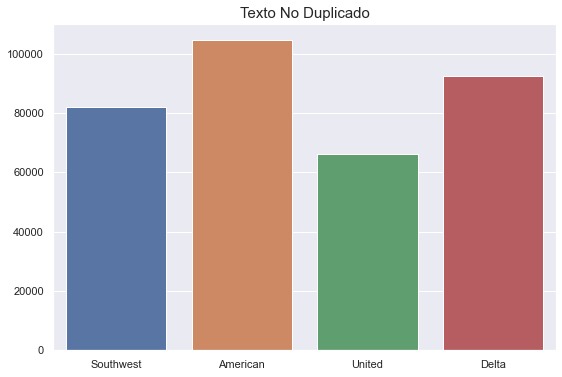

In [58]:
names = ['Southwest', 'American', 'United', 'Delta']
data = [southwest_tweets, american_tweets, united_tweets, delta_tweets]

sns.barplot(names, data)
plt.title('Texto No Duplicado', fontsize = 15)
plt.show()

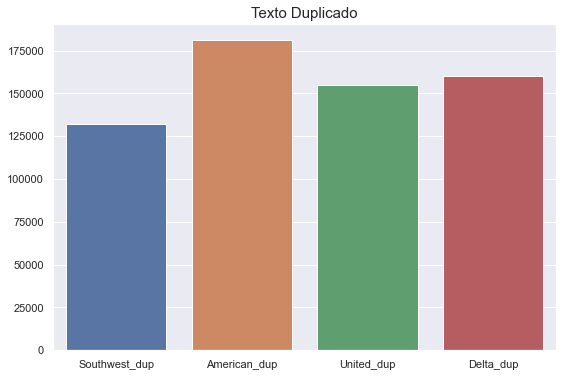

In [59]:
names_dup = ['Southwest_dup', 'American_dup', 'United_dup', 'Delta_dup']
data_dup = [southwest_tweets_dup, american_tweets_dup, united_tweets_dup, delta_tweets_dup]

sns.barplot(names_dup, data_dup)
plt.title('Texto Duplicado', fontsize = 15)
plt.show()

### Palabras comunes

Es interesante hacer un primer análisis de las palabras comunes para ambos conjuntos de datos

In [60]:
pd.Series(' '.join(df['text']).lower().split()).value_counts()[:20]

rt              269561
to              255550
the             236600
airlines        195905
a               152919
and             127911
for             113725
of              113145
flight          105450
is               90542
i                90120
@americanair     88944
@delta           86555
united           83376
in               83337
on               78853
at               76778
you              70164
american         67824
that             60510
dtype: int64

In [61]:
pd.Series(' '.join(df_text_no_dup['text']).lower().split()).value_counts()[:20]

to               126019
the              111212
airlines          81300
a                 76793
i                 72837
flight            72195
and               71207
@delta            69659
@americanair      63888
at                55099
for               54690
you               52293
@southwestair     50155
on                46478
is                44953
of                42076
in                40683
my                40669
@united           38075
spotted           34675
dtype: int64

Se observa como la palabra rt pierde su importancia una vez se eliminan los duplicados

In [62]:
df['text'] = df.text.str.lower()
rt_dup = df.text.str.count("rt").sum()
rt_dup

375534

In [63]:
df_text_no_dup['text'] = df_text_no_dup.text.str.lower()
rt_no_dup = df_text_no_dup.text.str.count("rt").sum()
rt_no_dup

81696

In [64]:
rt_dup - rt_no_dup

293838

Dentro del set de datos de emails duplicados, que incluía 254475 se comprueba que aparecía la palabra rt un total de 375534, por lo que es entendible que la gran mayoría de esos tweets son todo retweets, y habrá que analizar que es lo más conveniente para tratar dichos retweets.

También se aprecia una clara necesidad de limpieza de preposiciones y otro tipo de palabras. Por último, destaca la aparición de las aerolíneas mencionadas.

### Descripciones

In [65]:
df['retweet_count'].describe()

count    566641.000000
mean        659.593660
std        2598.458247
min           0.000000
25%           0.000000
50%           1.000000
75%         225.000000
max      659598.000000
Name: retweet_count, dtype: float64

In [66]:
df['favorite_count'].describe()

count    566641.000000
mean          2.748712
std         115.615561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       31127.000000
Name: favorite_count, dtype: float64